<Figure size 1800x1500 with 0 Axes>

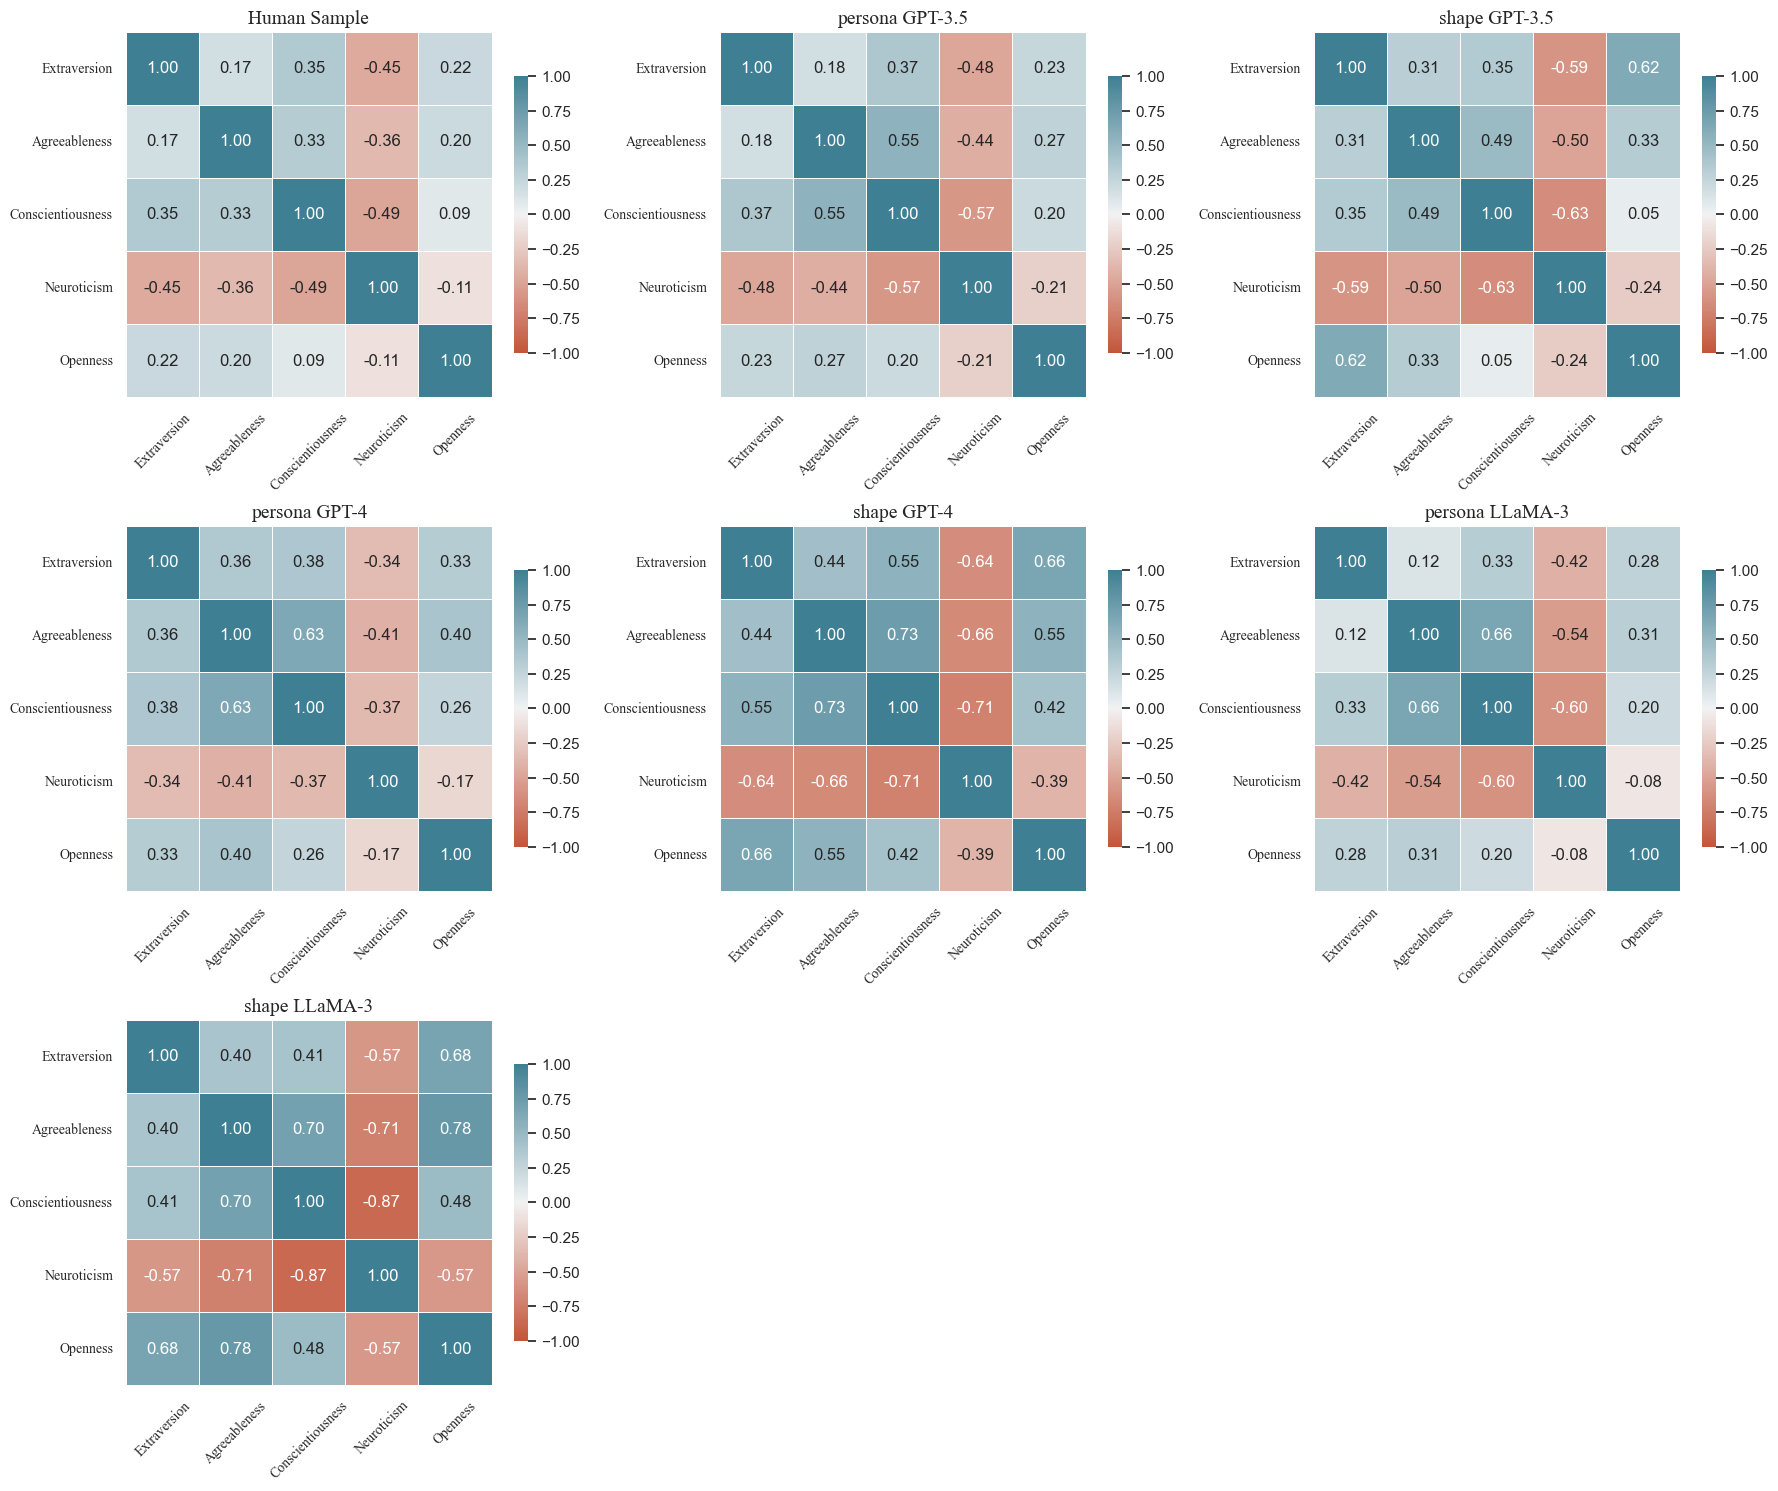

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    "data_normal_human_correlation_domain.csv",
    "data_persona_GPT3.5_correlation_domain.csv",
    "data_shape_GPT3.5_correlation_domain.csv",
    "data_persona_GPT4_correlation_domain.csv",
    "data_shape_GPT4_correlation_domain.csv",
    "data_persona_LLaMA3_correlation_domain.csv",
    "data_shape_LLaMA3_correlation_domain.csv"
]

titles = [
    "Human Sample",
    "persona GPT-3.5",
    "shape GPT-3.5",
    "persona GPT-4",
    "shape GPT-4",
    "persona LLaMA-3",
    "shape LLaMA-3"
]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for ax in axes:
    ax.remove() 

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, file in enumerate(files):
    data = pd.read_csv(file)
    dimension_scores = data[["Extraversion", "Agreeableness", "Conscientiousness", "Neuroticism", "Openness"]]
    correlation_matrix = dimension_scores.corr()
    
    sns.set(style='white')
    cmap = sns.diverging_palette(20, 220, as_cmap=True)
    
    sns.heatmap(correlation_matrix, mask=None, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .75}, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=14, fontname='Times New Roman')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    for tick in axes[i].get_xticklabels():
        tick.set_fontname('Times New Roman')
    for tick in axes[i].get_yticklabels():
        tick.set_fontname('Times New Roman')

for j in range(len(files), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig('correlation_matrices.svg', format='svg')
plt.savefig('correlation_matrices.pdf', format='pdf')
plt.savefig('correlation_matrices.png', format='png', dpi=300)

plt.show()


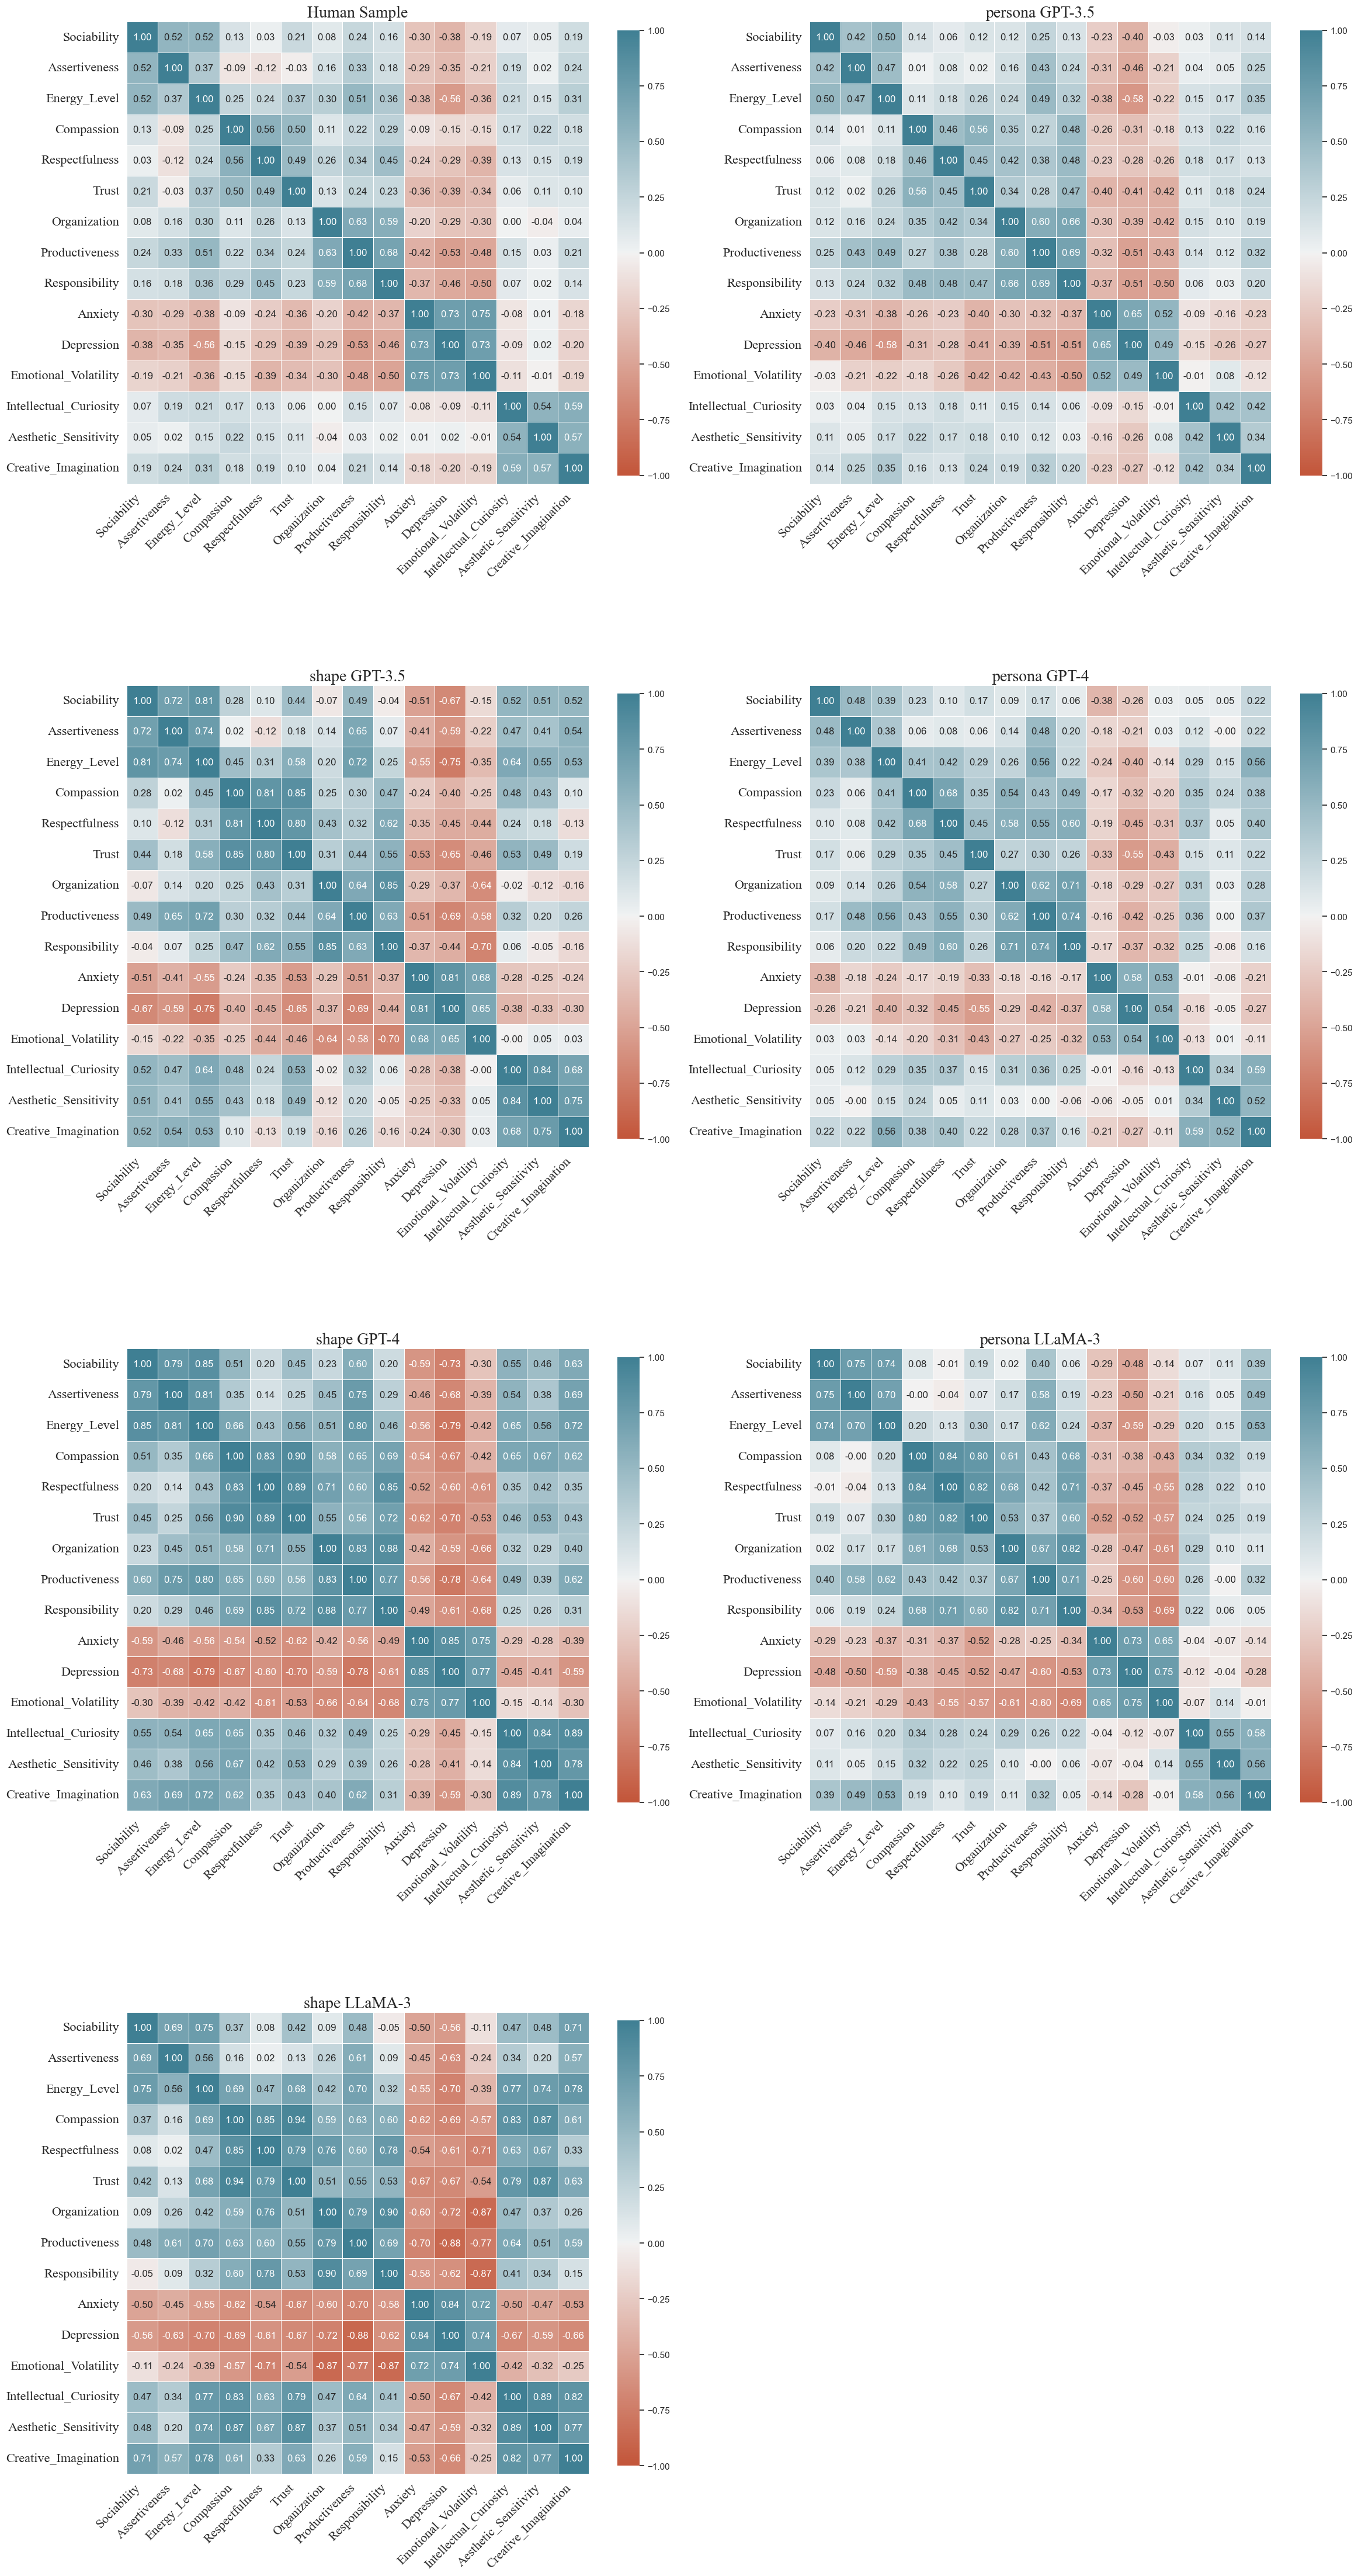

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files = [
    "data_normal_human_correlation_facet.csv",
    "data_persona_GPT3.5_correlation_facet.csv",
    "data_shape_GPT3.5_correlation_facet.csv",
    "data_persona_GPT4_correlation_facet.csv",
    "data_shape_GPT4_correlation_facet.csv",
    "data_persona_LLaMA3_correlation_facet.csv",
    "data_shape_LLaMA3_correlation_facet.csv"
]

labels = [
    "Human Sample",
    "persona GPT-3.5",
    "shape GPT-3.5",
    "persona GPT-4",
    "shape GPT-4",
    "persona LLaMA-3",
    "shape LLaMA-3"
]

sns.set(style='white')
cmap = sns.diverging_palette(20, 220, as_cmap=True)

fig, axs = plt.subplots(4, 2, figsize=(24, 48))

for idx, (file, label) in enumerate(zip(files, labels)):
    data = pd.read_csv(file)
    corr_matrix = data.corr()
    ax = axs[idx // 2, idx % 2]
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .75}, ax=ax)

    ax.set_title(label, fontsize=20, fontname='Times New Roman')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=16, fontname='Times New Roman')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16, fontname='Times New Roman')

for i in range(len(files), 8):
    fig.delaxes(axs[i // 2, i % 2])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

